In [1]:
# import necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
import scipy.stats as st
from scipy import stats

In [2]:
# read the data and drop unnecessary column 
data = pd.read_csv('goodreads_clean.csv')
data.drop(columns= 'Unnamed: 0', inplace=True)
data.head()

,user_id,gender,ratings_count,reviews_count,year_joined,young_age,location,friends,fav_genres,groups_count,...,avg_page_18,2019,avg_page_19,2020,avg_page_20,fav_genres2,category,category_simplified,total_page,challenge_completed
0,1,1,806,34,2014,1,Asia,103,"['Chick-lit', 'Christian', 'Ebooks', 'Fantasy'...",6,...,209,0,199,1,297,"['Romance', 'Religion', 'Fiction', 'Fiction', ...","{'Fiction', 'Non-fiction'}",1,705,1
1,2,1,822,90,2013,0,USA,225,"['Chick-lit', 'Contemporary', 'Fantasy', 'Fict...",0,...,388,1,383,1,355,"['Romance', 'Fiction', 'Fiction', 'Fiction', '...","{'Fiction', 'Non-fiction'}",1,1126,3
2,3,1,114,4,2014,1,Asia,7,"['Chick-lit', 'Contemporary', 'Ebooks', 'Roman...",1,...,288,1,292,0,284,"['Romance', 'Fiction', 'Romance', 'Self help',...","{'Fiction', 'Non-fiction'}",1,864,2
3,4,1,1265,630,2015,1,Asia,588,"['Fantasy', 'Historical fiction', 'Manga', 'Yo...",1,...,302,1,346,1,380,"['Fiction', 'Fiction', 'Comics', 'Young-adult']",{'Fiction'},1,1028,3
4,5,1,380,1,2014,0,EU,56,"['Comics', 'Fantasy', 'Historical fiction', 'H...",1,...,327,1,628,0,278,"['Comics', 'Fiction', 'Fiction', 'Humor Comedy...","{'Fiction', 'Non-fiction'}",1,1233,2


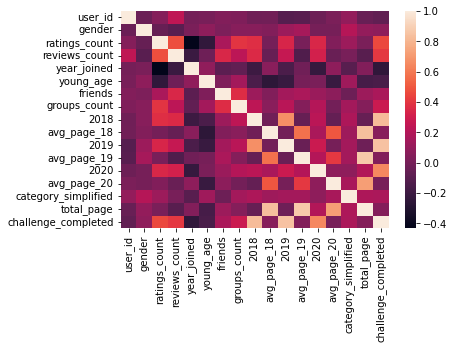

In [3]:
# heatmap correlation of the data
sns.heatmap(data.corr())
plt.show()

### are there any correlations between genre preferences and completing the challenge?

H0: the reader's genre preferences does not influence the completion of challenge

H1: the reader's genre preferences and the completion of challenge are related 

In [104]:
# used pandas crosstab to build a cross-tabulation table 
# that can show the frequency with which certain groups of data appear.
pd.crosstab(data['category_simplified'], data['challenge_completed'])

challenge_completed,0,1,2,3
category_simplified,,,,
0,9,8,9,8
1,11,12,16,27


In [105]:
# chi2_contingency computes the chi-square statistic and p-value for the hypothesis test of independence 
# of the observed frequencies in the contingency table

alpha = 0.10
st.chi2_contingency(pd.crosstab(data['category_simplified'], data['challenge_completed']))

# 1st value = stat
# 2nd value = p-value
# 3rd value = degrees of freedom = (num of columns - 1) * (num of rows -1) = (2-1)*(3-1)
# 4th value = array of expected value

(3.3804430863254384,
 0.3366024773986313,
 3,
 array([[ 6.8,  6.8,  8.5, 11.9],
        [13.2, 13.2, 16.5, 23.1]]))

- the p_value is bigger than the alpha
- we do not reject the null hypothesis

### do any groups (gender or age) have a preferences on fiction or non-fiction?

H0: the reader's gender does not influence their genre preference

H1: the reader's gender and the genre preference are related

In [106]:
pd.crosstab(data['category_simplified'], data['gender'])

gender,0,1
category_simplified,,
0,22,12
1,28,38


In [107]:
alpha = 0.10
chi2_contingency(pd.crosstab(data['category_simplified'], data['gender']))

(3.609625668449198,
 0.05744604858214854,
 1,
 array([[17., 17.],
        [33., 33.]]))

- the p_value is smaller than the alpha
- we reject the null hypothesis
- there seems to be a correlation between gender and genre preference

H0: the reader's age does not influence their genre preference

H1: the reader's age and the genre preference are related

In [108]:
pd.crosstab(data['category_simplified'], data['young_age'])

young_age,0,1
category_simplified,,
0,16,18
1,22,44


In [109]:
chi2_contingency(pd.crosstab(data['category_simplified'], data['young_age']))

(1.2590450596043314,
 0.2618319251912097,
 1,
 array([[12.92, 21.08],
        [25.08, 40.92]]))

In [21]:
pd.crosstab(data['category_simplified'], data['location'])

location,Asia,EU,USA
category_simplified,,,
0,10,14,10
1,24,23,19


In [23]:
chi2_contingency(pd.crosstab(data['category_simplified'], data['location']))

(0.5648379231483874,
 0.7539577390319778,
 2,
 array([[11.56, 12.58,  9.86],
        [22.44, 24.42, 19.14]]))

- the p_value is bigger than the alpha
- we do not reject the null hypothesis

### reader's characteristics and completion of challenge

In [3]:
pd.crosstab(data['gender'], data['challenge_completed'])

challenge_completed,0,1,2,3
gender,,,,
0,12,10,11,17
1,8,10,14,18


In [4]:
chi2_contingency(pd.crosstab(data['gender'], data['challenge_completed']))

(1.1885714285714286,
 0.7557466401166559,
 3,
 array([[10. , 10. , 12.5, 17.5],
        [10. , 10. , 12.5, 17.5]]))

In [19]:
pd.crosstab(data['location'], data['challenge_completed'])

challenge_completed,0,1,2,3
location,,,,
Asia,9,9,7,9
EU,6,5,13,13
USA,5,6,5,13


In [20]:
chi2_contingency(pd.crosstab(data['location'], data['challenge_completed']))

(6.574428093697871,
 0.3620007193304665,
 6,
 array([[ 6.8 ,  6.8 ,  8.5 , 11.9 ],
        [ 7.4 ,  7.4 ,  9.25, 12.95],
        [ 5.8 ,  5.8 ,  7.25, 10.15]]))

In [5]:
pd.crosstab(data['young_age'], data['challenge_completed'])

challenge_completed,0,1,2,3
young_age,,,,
0,6,6,9,17
1,14,14,16,18


In [6]:
chi2_contingency(pd.crosstab(data['young_age'], data['challenge_completed']))

(2.789231142372058,
 0.4252757322170736,
 3,
 array([[ 7.6,  7.6,  9.5, 13.3],
        [12.4, 12.4, 15.5, 21.7]]))

### do readers who joined more groups more likely to complete all the challenges?

H0: number of groups of readers who completed all the challenges <= number of groups of readers who did not complete all the challenges

H1: number of groups of readers who completed all the challenges > number of groups of readers who did not complete all the challenges

In [170]:
# the variables that we want to observed and compare
x = data[data['challenge_completed'] == 3]['groups_count']
y = data[data['challenge_completed'] == 0]['groups_count']

In [171]:
# to test two groups that we cannot match observations to one another we use the t-test independent method
alpha = 0.10
stat, p_value = st.ttest_ind(x,y, equal_var=False, alternative= 'greater')
print(stat)
print(p_value)
p_value < alpha

3.026185571481203
0.002010884312895007


True

- the p_value is lower when comparing 3vs2, 3vs1, 3vs0
- we reject the null hypothesis
- it seems that readers who joined more groups are more likely to complete all the challenges

### do readers who have more friends more likely to complete all the challenges?

H0: number of friends of readers who completed all the challenges <= number of friends of readers who did not complete all the challenges

H1: number of friends of readers who completed all the challenges > number of friends of readers who did not complete all the challenges

In [137]:
x = data[data['challenge_completed'] == 3]['friends']
y = data[data['challenge_completed'] == 1]['friends']

In [138]:
alpha = 0.10
stat, p_value = st.ttest_ind(x,y, equal_var=False, alternative= 'greater')
print(stat)
print(p_value)
p_value < alpha

1.201869043148737
0.11871696718738231


False

- the p_value is lower when comparing 3vs2 and 3vs0
- the p_value is higher when comparing 3vs1 
- we can't say for sure that readers who have more friends are more likely to complete all the challenges

### do young readers tend to join more groups?

H0: number of groups of young readers <= number of groups of non-young readers

H1: number of groups of young readers > number of groups of non-young readers

In [139]:
x = data[data['young_age'] == 1]['groups_count']
y = data[data['young_age'] == 0]['groups_count']

In [140]:
alpha = 0.10
stat, p_value = st.ttest_ind(x,y, equal_var=False, alternative= 'greater')
print(stat)
print(p_value)
p_value < alpha

1.5197767511861682
0.06605146700991349


True

- the p_value is lower
- we reject the null hypothesis
- it seems that young readers are more likely to join more groups

In [7]:
x = data[data['young_age'] == 1]['friends']
y = data[data['young_age'] == 0]['friends']

In [8]:
alpha = 0.10
stat, p_value = st.ttest_ind(x,y, equal_var=False, alternative= 'greater')
print(stat)
print(p_value)
p_value < alpha

0.2849935808176875
0.3882081899835877


False

### do female readers more sociable than male readers?

H0: number of groups of female readers <= number of groups of male readers

H1: number of groups of female readers > number of groups of male readers

In [142]:
x = data[data['gender'] == 1]['groups_count']
y = data[data['gender'] == 0]['groups_count']

In [144]:
alpha = 0.10
stat, p_value = st.ttest_ind(x,y, equal_var=False, alternative= 'greater')
print(stat)
print(p_value)
p_value < alpha

0.5830700539603625
0.280593188282426


False

- the p_value is higher
- we do not reject the null hypothesis

H0: number of friends of female readers <= number of friends of male readers

H1: number of friends of female readers > number of friends of male readers

In [149]:
x = data[data['gender'] == 1]['friends']
y = data[data['gender'] == 0]['friends']

In [150]:
alpha = 0.10
stat, p_value = st.ttest_ind(x,y, equal_var=False, alternative= 'greater')
print(stat)
print(p_value)
p_value < alpha

0.24572628570384805
0.4032075404931588


False

- the p_value is higher
- we do not reject the null hypothesis

### do readers who prefer fiction books read more pages on average?

H0: number of average page of readers who prefer fiction books <= number of average page of readers who prefer non-fiction books

H1: number of average page of readers who prefer fiction books > number of average page of readers who prefer non-fiction books

In [155]:
x = data[data['category_simplified'] == 1]['total_page']
y = data[data['category_simplified'] == 0]['total_page']

In [156]:
alpha = 0.10
stat, p_value = st.ttest_ind(x,y, equal_var=False, alternative= 'greater')
print(stat)
print(p_value)
p_value < alpha

1.9872559236201872
0.025015916663800115


True

- the p_value is lower
- we reject the null hypothesis
- it seems that readers who prefer to read fiction books tend to read more pages on average

### do people who completed all the challenges read more pages on average than those who don't?

H0: number of average page of readers who completed all the challenges <= number of average page of readers who did not complete all the challenges

H1: number of average page of readers who completed all the challenges > number of average page of readers who did not complete all the challenges

In [166]:
x = data[data['challenge_completed'] == 3]['total_page']
y = data[data['challenge_completed'] == 0]['total_page']

In [167]:
alpha = 0.10
stat, p_value = st.ttest_ind(x,y, equal_var=False, alternative= 'greater')
print(stat)
print(p_value)
p_value < alpha

1.674627205759383
0.04996306802044786


True

- the p_value is lower when comparing 3vs0
- the p_value is higher when comparing 3vs1 and 3vs2
- we can't say that people who completed all the challenges read more pages on average compared to those who did not complete the challenge

### do people who completed previous year's challenge more likely to finish the challenge?

H0: whether the reader completed the challenge on previous years does not influence the completion of the challenge on the next year

H1: whether the reader completed the challenge on previous years does are related with the completion of the challenge on the next year

In [175]:
# create a new data consisting of year, and a boolean value to indicate is the challenge complete or not
data2020 = data[['2020']].copy()
data2020['Year'] = '2020'
data2020.rename(columns={'2020':'complete_or_not'}, inplace=True)

data2019 = data[['2019']].copy()
data2019['Year'] = '2019'
data2019.rename(columns={'2019':'complete_or_not'}, inplace=True)

data2018 = data[['2018']].copy()
data2018['Year'] = '2018'
data2018.rename(columns={'2018':'complete_or_not'}, inplace=True)

data1 = pd.concat([data2020, data2019, data2018])

In [176]:
pd.crosstab(data1['complete_or_not'], data1['Year'])

Year,2018,2019,2020
complete_or_not,,,
0,49,40,36
1,51,60,64


In [174]:
alpha = 0.10
chi2_contingency(pd.crosstab(data1['complete_or_not'], data1['Year']))

(3.648,
 0.16137894240960496,
 2,
 array([[41.66666667, 41.66666667, 41.66666667],
        [58.33333333, 58.33333333, 58.33333333]]))

- the p_value is higher than the alpha
- we do not reject the null hypothesis

### do people who leave more reviews or ratings more likely to complete all the challenges?

H0: number of reviews of readers who completed all the challenges <= number of reviews of readers who did not complete all the challenges

H1: number of reviews of readers who completed all the challenges > number of reviews of readers who did not complete all the challenges

In [183]:
x = data[data['challenge_completed'] == 3]['reviews_count']
y = data[data['challenge_completed'] == 0]['reviews_count']

In [185]:
alpha = 0.10
stat, p_value = st.ttest_ind(x,y, equal_var=False)
print(stat)
print(p_value)
p_value < alpha

4.472860695512756
4.7073440991277276e-05


True

- the p_value is lower when comparing 3vs2, 3vs1, 3vs0
- we reject the null hypothesis
- it seems that readers who leave more reviews are more likely to complete all the challenges

H0: number of ratings of readers who completed all the challenges <= number of ratings of readers who did not complete all the challenges

H1: number of ratings of readers who completed all the challenges > number of ratings of readers who did not complete all the challenges

In [192]:
x = data[data['challenge_completed'] == 3]['ratings_count']
y = data[data['challenge_completed'] == 2]['ratings_count']

In [193]:
alpha = 0.10
stat, p_value = st.ttest_ind(x,y, equal_var=False)
print(stat)
print(p_value)
p_value < alpha

4.123095799276699
0.00018569216933366796


True

- the p_value is lower when comparing 3vs2, 3vs1, 3vs0
- we reject the null hypothesis
- it seems that readers who joined leave more ratings are more likely to complete all the challenges

### how well can we predict if someone will be able to complete the challenge based on these variables

In [196]:
# to predict whether someone will finish the challenge or not (yes or no)
# we use the logistic regression 

# independent variables
X = data[['reviews_count','ratings_count', 'friends', 'groups_count', 'gender', 'young_age', 'category_simplified']]
# dependent variable
y = data['2020'] 

model = LogisticRegression()
result = model.fit(X,y)

# the R2
# the predictive power of regression
# we get 70% of our prediction right 
result.score(X,y) 

0.7